In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

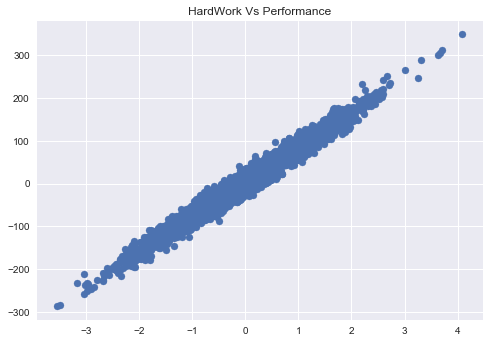

In [4]:
X = pd.read_csv("F:/CB Git/machine-learning-online-2018/3. Linear Regression/Linear Regression/Linear_X_Train.csv")
y = pd.read_csv("F:/CB Git/machine-learning-online-2018/3. Linear Regression/Linear Regression/Linear_Y_Train.csv")

X = X.values
y = y.values

plt.style.use("seaborn")
plt.title("HardWork Vs Performance")
plt.scatter(X,y)
plt.show()

In [5]:
print(X)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]


In [6]:
#Linear Regression

def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        total_error += (y_ - y)**2
    
    return total_error/m

def gradientDescent(X,Y,max_steps = 200, lr = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)

        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
    
    return theta,error_list

In [7]:
theta,error_list = gradientDescent(X,y)

In [8]:
theta

array([ 3.72798822, 80.54363175])

In [9]:
error_list

[array([6576.35005246]),
 array([5382.10116306]),
 array([4411.49946152]),
 array([3622.60756627]),
 array([2981.36244807]),
 array([2460.09492819]),
 array([2036.32790862]),
 array([1691.80078718]),
 array([1411.67742971]),
 array([1183.90311642]),
 array([998.68240386]),
 array([848.05513558]),
 array([725.55212733]),
 array([625.91553452]),
 array([544.87173451]),
 array([478.94684832]),
 array([425.31688589]),
 array([381.68600791]),
 array([346.18762175]),
 array([317.30402305]),
 array([293.8011006]),
 array([274.67527734]),
 array([259.1103913]),
 array([246.44265199]),
 array([236.13215782]),
 array([227.7397446]),
 array([220.90816592]),
 array([215.34679392]),
 array([210.819181]),
 array([207.13294679]),
 array([204.13155518]),
 array([201.6876277]),
 array([199.69750573]),
 array([198.07682823]),
 array([196.75693483]),
 array([195.6819403]),
 array([194.80635471]),
 array([194.09314753]),
 array([193.51217265]),
 array([193.03888696]),
 array([192.65330781]),
 array([192.3

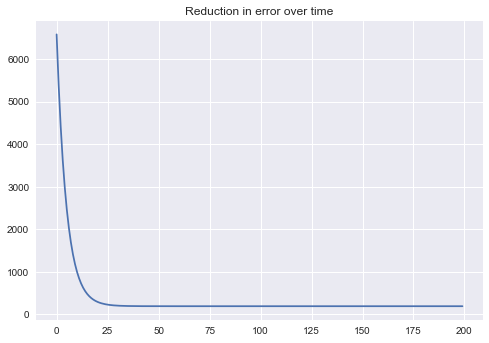

In [10]:
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

In [11]:
y_ = hypothesis(X, theta)

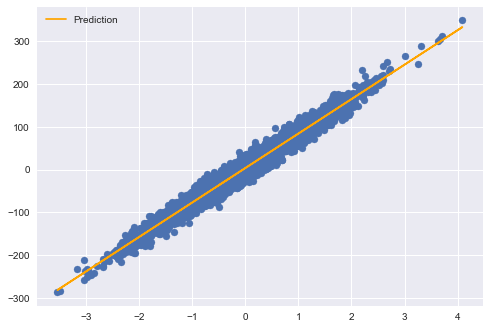

In [12]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [13]:
x_test = pd.read_csv("F:/CB Git/machine-learning-online-2018/3. Linear Regression/Linear Regression/Linear_X_Test.csv")
y_test = hypothesis(x_test, theta)

In [14]:
y_test

,x
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044959
4,51.329285
5,-100.624379
6,-12.125254
7,27.252959
8,-62.454158
9,-117.213618


In [15]:
df = pd.DataFrame(data=y_test,columns=["x"])

In [16]:
df

,x
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044959
4,51.329285
5,-100.624379
6,-12.125254
7,27.252959
8,-62.454158
9,-117.213618


In [23]:
df.to_csv('y_prediction.csv',index=False)

In [33]:
def r2_squared(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    
    return score*100

In [36]:
r2_squared(y,y_)

97.09612233822354

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [59]:
a = np.arange(-1,1,0.02)

a,b = np.meshgrid(a,b)

[[-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 ...
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]]
[[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.98 -0.98 -0.98 ... -0.98 -0.98 -0.98]
 [-0.96 -0.96 -0.96 ... -0.96 -0.96 -0.96]
 ...
 [ 0.94  0.94  0.94 ...  0.94  0.94  0.94]
 [ 0.96  0.96  0.96 ...  0.96  0.96  0.96]
 [ 0.98  0.98  0.98 ...  0.98  0.98  0.98]]


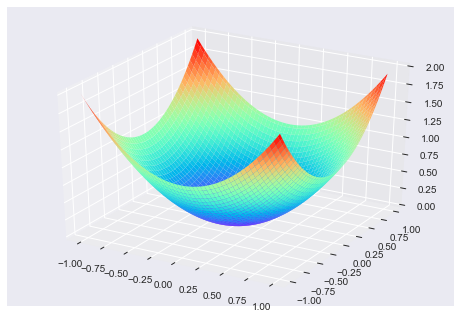

In [63]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.show()